##**Names:** Dare Odeyemi##

In [ ]:
from google.colab import drive # The code reading the folder containing all the images in the zip folders on google drive

drive.mount("/content/gdrive") #

Mounted at /content/gdrive


In [ ]:
!pip install opencv-python # Installing the opencv library 
!pip install matplotlib # Installing thr matplotlib
!pip install keras  #Installing Keras library
!pip install tensorflow # Installing tensorflow
!pip install seaborn # This is another image viisualisation. It helps to show the confusion matrix and AUC curve

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import glob
import os # Inporting all the relevant libraries that will be needed to read the multiple images from the surface datasets of images provided in the coursework
import numpy as np #Loading the numpy array library to allow for basic arithmetic and data some preparation functions
from sklearn.model_selection import train_test_split #
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score ## Running the Scores Library from the SVM
import numpy as np #Importing the numpy library. Its installation mostly comes with open-cv. It can also be installed seperatly.
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [ ]:
resize_width = 100 #Resizing the width of the images to 100
resize_height = 100 #Resizing the Lenghts of the Images to 100
path = '/content/gdrive/MyDrive/Lung Disease Dataset/train' #Reading the path
_images = [] # List to append the images as 2D numpy arrays.
_target = [] # List to append the target
O_repo = [] # Create a repo for flattened pixels
repothreshold1 = [] #Creeating the empty list for  Binarised images for feature extraction

for root, dirs, files in os.walk(path): #Looping through each images through the directories in the gdrive path.
     for file in files:
        with open(os.path.join(root, file), "r") as auto:
            try:
                img = cv2.imread(root+'/'+file, 0) #Reading the images into a variable img
                #imgshow = plt.imshow(img)
                img = cv2.resize(img, (resize_width, resize_height)) #Effecting the resized template.
                ret,threshold1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY) #This is not required at this level. It was just created if there is need for further research on this work.
                repothreshold1.append(threshold1)
                _images.append(img)
                # Append the flattened image to the pixel repo
                O_repo.append(img.flatten())
                # Append the folder where the image is to the target list
                _target.append(root.replace(path,'').replace('\\','').replace('/','')) #joining the target in the path directory to the variables and replacing slashes with nothing.
            except Exception as e:
                print("Invalid file "+file+" skipped.")
# Convert the repo list into numpy array
O_repo = np.array(O_repo)
repothreshold1 = np.array(repothreshold1)
_images = np.array(_images)
#_target = np.array(_target)
#plt.imshow(_images)
print('Threshold Datasets:', repothreshold1)
print('The classes of Surface data:', _target)
print('Shapes of the surface data:',repothreshold1.shape)
print('The size of the Surface datasets:', repothreshold1.size)
print('The shape of the surfaces', _images.shape)
#print('The size of the Target Images:', _target.size)

Threshold Datasets: [[[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[255 255 255 ...   0   0   0]
  [255 255 255 ...   0   0   0]
  [255 255 255 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 ...

 [[255 255   0 ... 255 255 255]
  [255   0 255 ... 255 255 255]
  [255 255   0 ... 255 255 255]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0  

In [ ]:
_images.shape

(4585, 100, 100)

In [ ]:
np.unique(_target)

array(['Bacterial Pneumonia', 'Corona Virus Disease', 'Normal',
       'Tuberculosis', 'Viral Pneumonia'], dtype='<U20')

In [ ]:
np.array(_target)

array(['Normal', 'Normal', 'Normal', ..., 'Bacterial Pneumonia',
       'Bacterial Pneumonia', 'Bacterial Pneumonia'], dtype='<U20')

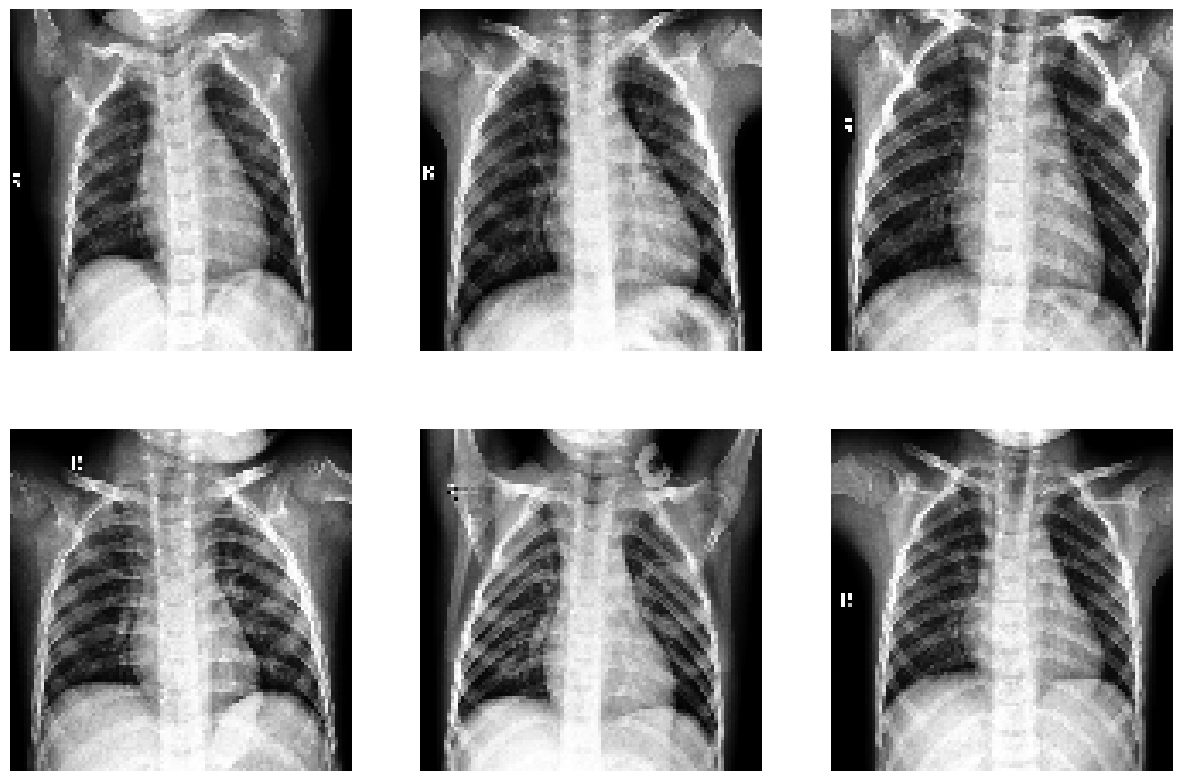

In [ ]:
# Define the number of rows and columns for the subplot grid
nrows = 2 # Number of columns
ncols = 3 # Number of rows.

# Create a new figure and set its size
fig, axs = plt.subplots(nrows, ncols, figsize=(15, 10))

# Loop through the images and plot them in the subplot grid
for i in range(nrows):
  for j in range(ncols):
    # Compute the index of the current image
    idx = i * ncols + j
    # Get the image from the repothreshold4 list
    img = _images[idx]
    #img = repothreshold1[idx]
    # Plot the image in the subplot grid
    axs[i, j].imshow(img, cmap='gray')
    axs[i, j].axis('off')

# Show the plot
plt.show()

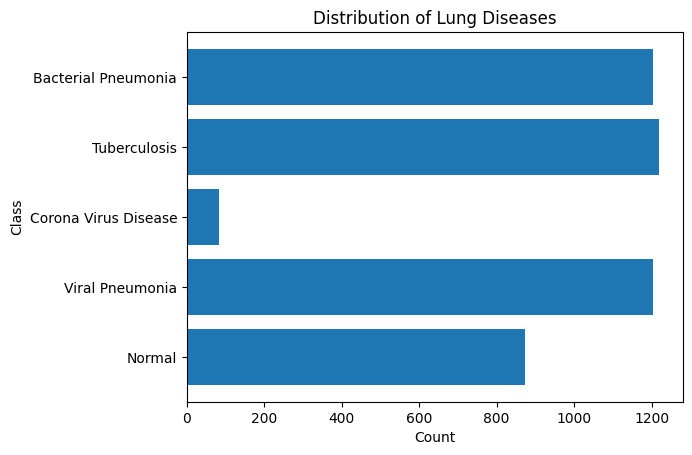

In [ ]:
# Count the occurrences of each target value
target_counts = {}
for target in _target:
    if target in target_counts:
        target_counts[target] += 1
    else:
        target_counts[target] = 1

# Create a bar chart of the target counts
plt.barh(list(target_counts.keys()), list(target_counts.values()))  # Use barh for horizontal orientation

# Add axis labels and title
plt.xlabel('Count')  # Swap xlabel and ylabel
plt.ylabel('Class')
plt.title('Distribution of Lung Diseases')

# Show the plot
plt.show()


In [ ]:
target_Bin = [] #Create an empty list for the binarised target.
target_Bin = [1 if i == 'Bacterial Pneumonia' 
              else 2 if i == 'Corona Virus Disease' 
              else 3 if i == 'Tuberculosis' 
              else 4 if i == 'Viral Pneumonia' 
              else 0  for i in _target] #Ascribe number 1 to positive and 0 to negative since this is not a medical data.
target_Bin=np.array(target_Bin) #Convert the target to numpy array
print(target_Bin,target_Bin.shape)

[0 0 0 ... 1 1 1] (4585,)


In [ ]:
np.unique(target_Bin)

array([0, 1, 2, 3, 4])

##**Fitting SVM Model**##

This model will be fitted along with 5 fold startified cross validation technic and each of these fold will be splited to train and test datasets to obtain model metrics for each folds. 

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

np.random.seed(123)
# Create the SVM model
svm_model = SVC()

# Perform stratified five-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in stratified_kfold.split(_images, target_Bin):
    X_train, X_test = O_repo[train_index], O_repo[test_index]
    y_train, y_test = target_Bin[train_index], target_Bin[test_index]

    # Train the model
    svm_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svm_model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = svm_model.score(X_test, y_test)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append scores to respective lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Print the evaluation metrics for each fold
for fold_idx in range(len(accuracy_scores)):
    print(f"Fold {fold_idx+1}:")
    print("Accuracy:", accuracy_scores[fold_idx])
    print("Precision:", precision_scores[fold_idx])
    print("Recall:", recall_scores[fold_idx])
    print("F1-score:", f1_scores[fold_idx])
    print()

# Calculate the average scores across all folds
average_accuracy = np.mean(accuracy_scores)
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)
average_f1 = np.mean(f1_scores)

print("Average Accuracy:", average_accuracy)
print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1-score:", average_f1)


Fold 1:
Accuracy: 0.7928026172300982
Precision: 0.7907613720949658
Recall: 0.7928026172300982
F1-score: 0.7909390164694531

Fold 2:
Accuracy: 0.772082878953108
Precision: 0.7761378439492235
Recall: 0.772082878953108
F1-score: 0.7722108703594935

Fold 3:
Accuracy: 0.777535441657579
Precision: 0.7720293645055458
Recall: 0.777535441657579
F1-score: 0.7720383085323005

Fold 4:
Accuracy: 0.7862595419847328
Precision: 0.7859487202558456
Recall: 0.7862595419847328
F1-score: 0.7841625745237987

Fold 5:
Accuracy: 0.7808069792802618
Precision: 0.7817828577237755
Recall: 0.7808069792802618
F1-score: 0.7794232000697863

Average Accuracy: 0.781897491821156
Average Precision: 0.7813320317058713
Average Recall: 0.781897491821156
Average F1-score: 0.7797547939909665


##**Fitting the Random Forest**##
The model uses thesame approach as the SVM above but it fit the random forest model staright away.

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

np.random.seed(123)

# Create the Random Forest model
rf_model = RandomForestClassifier()

# Perform stratified five-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in stratified_kfold.split(O_repo, target_Bin):
    X_train, X_test = O_repo[train_index], O_repo[test_index]
    y_train, y_test = target_Bin[train_index], target_Bin[test_index]

    # Train the model
    rf_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = rf_model.score(X_test, y_test)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append scores to respective lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Print the evaluation metrics for each fold
for fold_idx in range(len(accuracy_scores)):
    print(f"Fold {fold_idx+1}:")
    print("Accuracy:", accuracy_scores[fold_idx])
    print("Precision:", precision_scores[fold_idx])
    print("Recall:", recall_scores[fold_idx])
    print("F1-score:", f1_scores[fold_idx])
    print()

# Calculate the average scores across all folds
average_accuracy = np.mean(accuracy_scores)
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)
average_f1 = np.mean(f1_scores)

print("Average Accuracy:", average_accuracy)
print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1-score:", average_f1)


Fold 1:
Accuracy: 0.7360959651035986
Precision: 0.7330419469339514
Recall: 0.7360959651035986
F1-score: 0.7258491663198272

Fold 2:
Accuracy: 0.7502726281352236
Precision: 0.7510950302759123
Recall: 0.7502726281352236
F1-score: 0.7439430941719243

Fold 3:
Accuracy: 0.7677208287895311
Precision: 0.7597862660697438
Recall: 0.7677208287895311
F1-score: 0.758607890215139

Fold 4:
Accuracy: 0.772082878953108
Precision: 0.7689276425958513
Recall: 0.772082878953108
F1-score: 0.7649601846261843

Fold 5:
Accuracy: 0.7742639040348964
Precision: 0.7717392515239704
Recall: 0.7742639040348964
F1-score: 0.765609506279621

Average Accuracy: 0.7600872410032714
Average Precision: 0.7569180274798858
Average Recall: 0.7600872410032714
Average F1-score: 0.7517939683225391


##**Fitting the CNN Model**##

Fitting the CNN model and to calculate all metrics.

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical


# Define the CNN model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 1)))  # Update the input shape
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))  # num_classes is the number of output classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Perform stratified five-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in stratified_kfold.split(_images, target_Bin):
    X_train, X_test = _images[train_index], _images[test_index]
    y_train, y_test = target_Bin[train_index], target_Bin[test_index]

    # Convert target labels to categorical format
    y_train_categorical = to_categorical(y_train, 5)
    y_test_categorical = to_categorical(y_test, 5)

    # Reshape the input images to include the channel dimension
    X_train = np.expand_dims(X_train, axis=-1)
    X_test = np.expand_dims(X_test, axis=-1)

    # Train the model
    model.fit(X_train, y_train_categorical, epochs=10, batch_size=32, verbose=0)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_labels = np.argmax(y_pred, axis=1)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_labels)
    precision = precision_score(y_test, y_pred_labels, average='weighted')
    recall = recall_score(y_test, y_pred_labels, average='weighted')
    f1 = f1_score(y_test, y_pred_labels, average='weighted')

    # Append scores to respective lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Print the evaluation metrics for each fold
for fold_idx in range(len(accuracy_scores)):
    print(f"Fold {fold_idx+1}:")
    print("Accuracy:", accuracy_scores[fold_idx])
    print("Precision:", precision_scores[fold_idx])
    print("Recall:", recall_scores[fold_idx])
    print("F1-score:", f1_scores[fold_idx])
    print()

# Calculate the average scores across all folds
average_accuracy = np.mean(accuracy_scores)
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)
average_f1 = np.mean(f1_scores)

print("Average Accuracy:", average_accuracy)
print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1-score:", average_f1)


29/29 [==============================] - 3s 111ms/step
Fold 1:
Accuracy: 0.7251908396946565
Precision: 0.7189626969708643
Recall: 0.7251908396946565
F1-score: 0.7211891591981859

Fold 2:
Accuracy: 0.9007633587786259
Precision: 0.9008989488866223
Recall: 0.9007633587786259
F1-score: 0.9006808288143056

Fold 3:
Accuracy: 0.9770992366412213
Precision: 0.9773028113120408
Recall: 0.9770992366412213
F1-score: 0.977094220124174

Fold 4:
Accuracy: 0.9116684841875682
Precision: 0.9117624286504205
Recall: 0.9116684841875682
F1-score: 0.9112935508418272

Fold 5:
Accuracy: 0.9836423118865867
Precision: 0.984019980011016
Recall: 0.9836423118865867
F1-score: 0.9836459589490348

Average Accuracy: 0.8996728462377316
Average Precision: 0.8985893731661928
Average Recall: 0.8996728462377316
Average F1-score: 0.8987807435855055


##**Confusion Matrix Curve**##

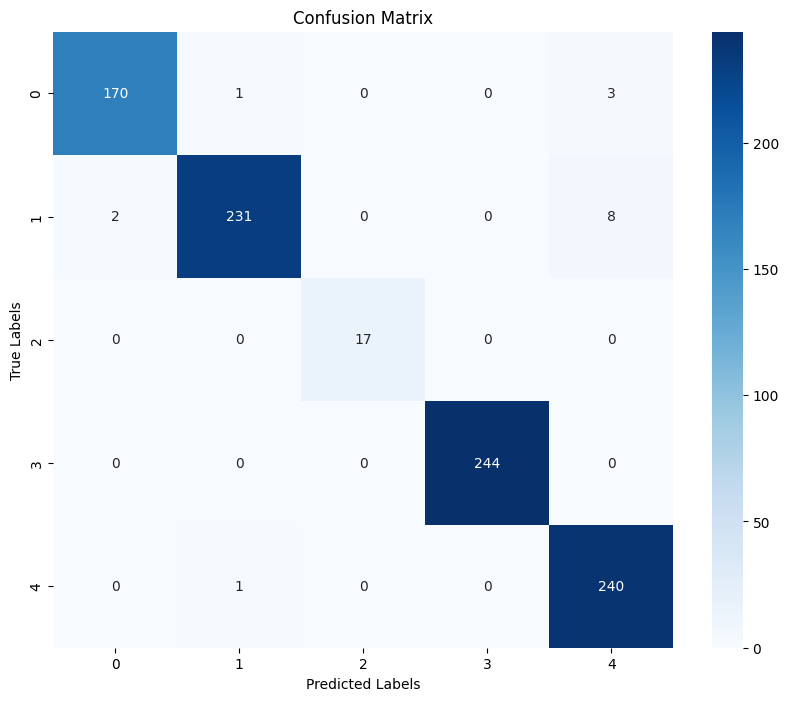

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix
from sklearn.metrics import roc_curve, auc
import seaborn as sns

#Build a Confusion Matrix 
# Calculate the confusion matrix
 # Calculate the confusion matrix

confusion_matrices = []
cm = confusion_matrix(y_test, y_pred_labels)
confusion_matrices.append(cm)

# Calculate the average confusion matrix
average_cm = np.mean(confusion_matrices, axis=0)

plt.figure(figsize=(10, 8))
sns.heatmap(average_cm, annot=True, fmt='.4g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()








##**Receiver Operating Curve**##

29/29 [==============================] - 3s 110ms/step


<ipython-input-20-af09fc1cb3e6>:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='gray', label='Random')


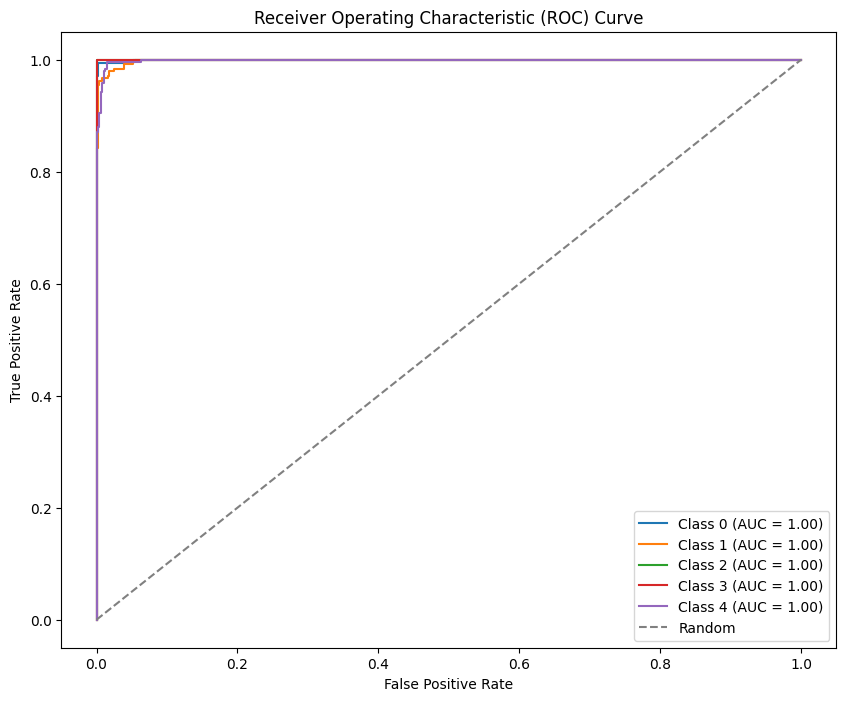

In [ ]:
#AUC Chart

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Convert the true labels to one-hot encoded format
y_one_hot = label_binarize(y_test, classes=np.unique(y_test))

# Calculate the probabilities for each class
y_probs = model.predict(X_test)

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):  # Replace 'n_classes' with the actual number of classes
    fpr[i], tpr[i], _ = roc_curve(y_one_hot[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(5):
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()




##**Feature Extractions**##

The above algorithm runs without any forms of feature extraction. In this session, we shall explore feature extraction and fit non neural network. We will then compare to the CNN model used above interms of model metrics performance.

Also, feature extraction to be explored are Haris Corners, HOG, SIFT and Binary thresholding.

##Haris Corner's Feature Extraction Technic##

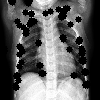

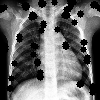

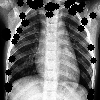

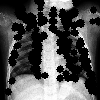

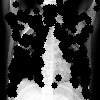

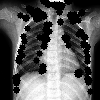

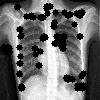

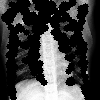

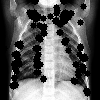

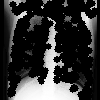

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Initialize an empty list to store the detected corner points
corner_points = []

# Loop through each image in _images
for image in _images[:10]:  # Show only the first 10 images
    # Apply Harris corner detection
    corners = cv2.cornerHarris(image, blockSize=2, ksize=3, k=0.04)
    
    # Threshold the corner response to extract strong corners
    threshold = 0.01 * corners.max()
    corner_mask = corners > threshold
    
    # Find the coordinates of the corner points
    corner_coordinates = np.argwhere(corner_mask)
    
    # Append the corner points to the list
    corner_points.append(corner_coordinates)

# Visualize the corner points
for i, image in enumerate(_images[:10]):
    for point in corner_points[i]:
        cv2.circle(image, tuple(point[::-1]), 3, (0, 255, 0), -1)
    cv2_imshow(image)




  


##Corner's Dilated View##

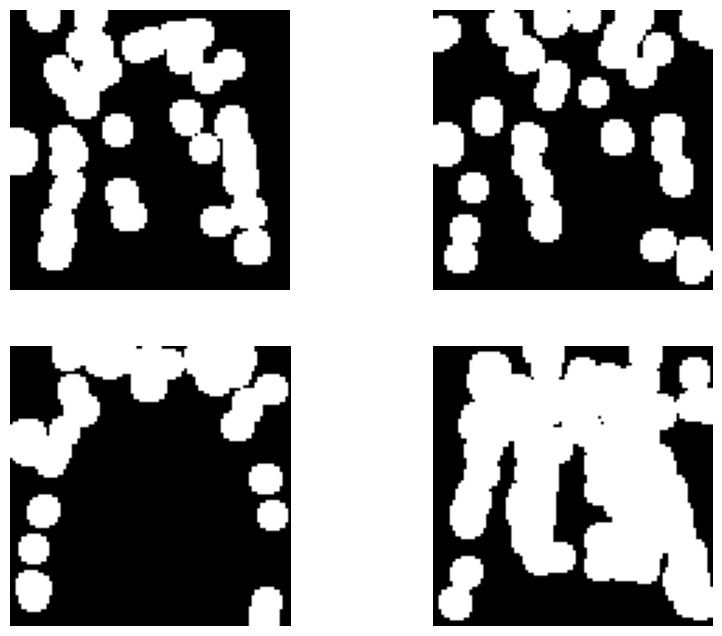

In [ ]:
import cv2
import matplotlib.pyplot as plt

nrows = 2  # Number of rows
ncols = 2  # Number of columns

# Create a new figure and set its size
fig, axs = plt.subplots(nrows, ncols, figsize=(10, 8))

# Loop through the images and plot them in the subplot grid
for i in range(nrows):
    for j in range(ncols):
        # Compute the index of the current image
        idx = i * ncols + j
        
        # Get the corner points of the current image
        points = corner_points[idx]
        
        # Create an empty image with the same shape as the original image
        img = np.zeros_like(_images[idx])
        
        # Mark the corner points on the image
        for point in points:
            cv2.circle(img, tuple(point[::-1]), 3, (255, 255, 255), -1)
        
        # Dilate the corner points
        dilated_img = cv2.dilate(img, None, iterations=2)  # Adjust the number of iterations as needed
        
        # Plot the dilated image in the subplot grid
        axs[i, j].imshow(dilated_img, cmap='gray')
        axs[i, j].axis('off')

# Show the plot
plt.show()




In [ ]:
# Initialize an empty list to store the detected corner points
corner_points = []

# Loop through each image in _images
for image in _images:  # Show only the first 10 images
    # Apply Harris corner detection
    corners = cv2.cornerHarris(image, blockSize=2, ksize=3, k=0.04)
    
    # Threshold the corner response to extract strong corners
    threshold = 0.01 * corners.max()
    corner_mask = corners > threshold
    
    # Find the coordinates of the corner points
    corner_coordinates = np.argwhere(corner_mask)
    
    # Append the corner points to the list
    corner_points.append(corner_coordinates)

##**Using Haris Corners Points to fit SVM Model**##

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def harris_corner_detector(image):
    dst = cv2.cornerHarris(image, blockSize=2, ksize=3, k=0.04)
    dst = cv2.dilate(dst, None)
    ret, dst = cv2.threshold(dst, 0.01 * dst.max(), 255, 0)
    dst = np.uint8(dst)
    return dst.flatten()

# Extract Harris corners
corners = [harris_corner_detector(image) for image in _images]

# Convert corners to a 2D array
corners = np.array(corners)

labels = np.array(target_Bin)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
recalls = []
precisions = []
f1_scores = []

for train_index, test_index in skf.split(corners, labels):
    X_train, X_test = corners[train_index], corners[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    # Train the SVM classifier
    svm = SVC(kernel='linear')
    svm.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svm.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Store the metrics for this fold
    accuracies.append(accuracy)
    recalls.append(recall)
    precisions.append(precision)
    f1_scores.append(f1)

mean_accuracy = np.mean(accuracies)
mean_recall = np.mean(recalls)
mean_precision = np.mean(precisions)
mean_f1 = np.mean(f1_scores)

print("Mean Accuracy:", mean_accuracy)
print("Mean Recall:", mean_recall)
print("Mean Precision:", mean_precision)
print("Mean F1 Score:", mean_f1)


Mean Accuracy: 0.6013086150490732
Mean Recall: 0.5539324871726051
Mean Precision: 0.5529998080650718
Mean F1 Score: 0.5520278752306151


##**Randon Forest Classification**##

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def harris_corner_detector(image):
    dst = cv2.cornerHarris(image, blockSize=2, ksize=3, k=0.04)
    dst = cv2.dilate(dst, None)
    ret, dst = cv2.threshold(dst, 0.01 * dst.max(), 255, 0)
    dst = np.uint8(dst)
    return dst.flatten()

# Extract Harris corners
corners = [harris_corner_detector(image) for image in _images]

# Convert corners to a 2D array
corners = np.array(corners)

labels = np.array(target_Bin)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
recalls = []
precisions = []
f1_scores = []

for train_index, test_index in skf.split(corners, labels):
    X_train, X_test = corners[train_index], corners[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    # Train the Random Forest classifier
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Store the metrics for this fold
    accuracies.append(accuracy)
    recalls.append(recall)
    precisions.append(precision)
    f1_scores.append(f1)

mean_accuracy = np.mean(accuracies)
mean_recall = np.mean(recalls)
mean_precision = np.mean(precisions)
mean_f1 = np.mean(f1_scores)

print("Mean Accuracy:", mean_accuracy)
print("Mean Recall:", mean_recall)
print("Mean Precision:", mean_precision)
print("Mean F1 Score:", mean_f1)



Mean Accuracy: 0.6673936750272628
Mean Recall: 0.5718779515331109
Mean Precision: 0.7166918303269327
Mean F1 Score: 0.5778346269370773


##**Decision Trees**##

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def harris_corner_detector(image):
    dst = cv2.cornerHarris(image, blockSize=2, ksize=3, k=0.04)
    dst = cv2.dilate(dst, None)
    ret, dst = cv2.threshold(dst, 0.01 * dst.max(), 255, 0)
    dst = np.uint8(dst)
    return dst.flatten()

# Extract Harris corners
corners = [harris_corner_detector(image) for image in _images]

# Convert corners to a 2D array
corners = np.array(corners)

labels = np.array(target_Bin)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
recalls = []
precisions = []
f1_scores = []

for train_index, test_index in skf.split(corners, labels):
    X_train, X_test = corners[train_index], corners[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    # Train the Decision Tree classifier
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = dt.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Store the metrics for this fold
    accuracies.append(accuracy)
    recalls.append(recall)
    precisions.append(precision)
    f1_scores.append(f1)

mean_accuracy = np.mean(accuracies)
mean_recall = np.mean(recalls)
mean_precision = np.mean(precisions)
mean_f1 = np.mean(f1_scores)

print("Mean Accuracy:", mean_accuracy)
print("Mean Recall:", mean_recall)
print("Mean Precision:", mean_precision)
print("Mean F1 Score:", mean_f1)


Mean Accuracy: 0.5049073064340239
Mean Recall: 0.44603913314524196
Mean Precision: 0.44399933742289405
Mean F1 Score: 0.4441059413455365


##**Using a Gradient Boosting Classifier**##

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def harris_corner_detector(image):
    dst = cv2.cornerHarris(image, blockSize=2, ksize=3, k=0.04)
    dst = cv2.dilate(dst, None)
    ret, dst = cv2.threshold(dst, 0.01 * dst.max(), 255, 0)
    dst = np.uint8(dst)
    return dst.flatten()

# Extract Harris corners
corners = [harris_corner_detector(image) for image in _images]

# Convert corners to a 2D array
corners = np.array(corners)

labels = np.array(target_Bin)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
recalls = []
precisions = []
f1_scores = []

for train_index, test_index in skf.split(corners, labels):
    X_train, X_test = corners[train_index], corners[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    # Train the Gradient Boosting classifier (XGBoost)
    xgb = XGBClassifier(random_state=42)
    xgb.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = xgb.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Store the metrics for this fold
    accuracies.append(accuracy)
    recalls.append(recall)
    precisions.append(precision)
    f1_scores.append(f1)

mean_accuracy = np.mean(accuracies)
mean_recall = np.mean(recalls)
mean_precision = np.mean(precisions)
mean_f1 = np.mean(f1_scores)

print("Mean Accuracy:", mean_accuracy)
print("Mean Recall:", mean_recall)
print("Mean Precision:", mean_precision)
print("Mean F1 Score:", mean_f1)



Mean Accuracy: 0.6634678298800436
Mean Recall: 0.5751153040293777
Mean Precision: 0.673903592340574
Mean F1 Score: 0.5857910560354649


##**Histogram Oriented Gradient**##

This is another feature extration technic for images. And we will run all the required non neural network classifiers to obtain the model metrics.

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from skimage.feature import hog
from skimage import data, exposure

def extract_hog_features(image):
    # Apply HOG feature extraction
    hog_features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                                 cells_per_block=(2, 2), visualize=True, multichannel=False)
    hog_features = hog_features.reshape(-1)  # Flatten the feature vector
    return hog_features

# Extract HOG features
hog_features = [extract_hog_features(image) for image in _images]

# Convert features to a 2D array
hog_features = np.array(hog_features)

labels = np.array(target_Bin)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
recalls = []
precisions = []
f1_scores = []

for train_index, test_index in skf.split(hog_features, labels):
    X_train, X_test = hog_features[train_index], hog_features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    # Train the SVM classifier
    svm = SVC(kernel='linear')
    svm.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svm.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Store the metrics for this fold
    accuracies.append(accuracy)
    recalls.append(recall)
    precisions.append(precision)
    f1_scores.append(f1)

mean_accuracy = np.mean(accuracies)
mean_recall = np.mean(recalls)
mean_precision = np.mean(precisions)
mean_f1 = np.mean(f1_scores)

print("Mean Accuracy:", mean_accuracy)
print("Mean Recall:", mean_recall)
print("Mean Precision:", mean_precision)
print("Mean F1 Score:", mean_f1)


<ipython-input-12-1a3db486bf24>:10: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),


Mean Accuracy: 0.759432933478735
Mean Recall: 0.7536561693004244
Mean Precision: 0.7875659117773758
Mean F1 Score: 0.7674669695517502


##**Random Forest with HOG**##

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from skimage.feature import hog

def extract_hog_features(image):
    # Apply HOG feature extraction
    hog_features = hog(image, orientations=9, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys')
    return hog_features

# Extract HOG features
hog_features = [extract_hog_features(image) for image in _images]

# Convert features to a 2D array
hog_features = np.array(hog_features)

labels = np.array(target_Bin)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
recalls = []
precisions = []
f1_scores = []

for train_index, test_index in skf.split(hog_features, labels):
    X_train, X_test = hog_features[train_index], hog_features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    # Train the Random Forest classifier
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Store the metrics for this fold
    accuracies.append(accuracy)
    recalls.append(recall)
    precisions.append(precision)
    f1_scores.append(f1)

mean_accuracy = np.mean(accuracies)
mean_recall = np.mean(recalls)
mean_precision = np.mean(precisions)
mean_f1 = np.mean(f1_scores)

print("Mean Accuracy:", mean_accuracy)
print("Mean Recall:", mean_recall)
print("Mean Precision:", mean_precision)
print("Mean F1 Score:", mean_f1)


Mean Accuracy: 0.7701199563794984
Mean Recall: 0.6560995294470605
Mean Precision: 0.8156899181115774
Mean F1 Score: 0.6677888593375607


##**XG Boost Model with HOG**##

In [ ]:
 b6import numpy as np
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from skimage.feature import hog

def extract_hog_features(image):
    # Apply HOG feature extraction
    hog_features = hog(image, orientations=9, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys')
    return hog_features

# Extract HOG features
hog_features = [extract_hog_features(image) for image in _images]

# Convert features to a 2D array
hog_features = np.array(hog_features)

labels = np.array(target_Bin)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
recalls = []
precisions = []
f1_scores = []

for train_index, test_index in skf.split(hog_features, labels):
    X_train, X_test = hog_features[train_index], hog_features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    # Train the Gradient Boosting classifier (XGBoost)
    xgb = XGBClassifier(random_state=42)
    xgb.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = xgb.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Store the metrics for this fold
    accuracies.append(accuracy)
    recalls.append(recall)
    precisions.append(precision)
    f1_scores.append(f1)

mean_accuracy = np.mean(accuracies)
mean_recall = np.mean(recalls)
mean_precision = np.mean(precisions)
mean_f1 = np.mean(f1_scores)

print("Mean Accuracy:", mean_accuracy)
print("Mean Recall:", mean_recall)
print("Mean Precision:", mean_precision)
print("Mean F1 Score:", mean_f1)


Mean Accuracy: 0.790185387131952
Mean Recall: 0.7018586290221425
Mean Precision: 0.8192316975589111
Mean F1 Score: 0.7246069616270869


##**SIFT Technic Of Feature Extraction**##

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import cv2

def convert_to_bgr(image):
    return cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

def extract_sift_features(image):
    bgr_image = convert_to_bgr(image)

    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(bgr_image, None)

    # Check if descriptors are empty
    if descriptors is None:
        descriptors = np.zeros((0, 128))

    return descriptors

sift_features = []
labels = []

for image, label in zip(_images, target_Bin):
    features = extract_sift_features(image)
    if len(features) > 0:
        sift_features.extend(features)
        labels.extend([label] * len(features))

sift_features = np.array(sift_features)
labels = np.array(labels)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
recalls = []
precisions = []
f1_scores = []

for train_index, test_index in skf.split(sift_features, labels):
    X_train, X_test = sift_features[train_index], sift_features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    svm = SVC(kernel='linear')
    svm.fit(X_train, y_train)

    y_pred = svm.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    accuracies.append(accuracy)
    recalls.append(recall)
    precisions.append(precision)
    f1_scores.append(f1)

mean_accuracy = np.mean(accuracies)
mean_recall = np.mean(recalls)
mean_precision = np.mean(precisions)
mean_f1 = np.mean(f1_scores)

print("Mean Accuracy:", mean_accuracy)
print("Mean Recall:", mean_recall)
print("Mean Precision:", mean_precision)
print("Mean F1 Score:", mean_f1)


##**Randon Forest with SIFT Technic**##

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import cv2

def convert_to_bgr(image):
    return cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

def extract_sift_features(image):
    bgr_image = convert_to_bgr(image)

    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(bgr_image, None)

    # Check if descriptors are empty
    if descriptors is None:
        descriptors = np.zeros((0, 128))

    return descriptors

sift_features = []
labels = []

for image, label in zip(_images, target_Bin):
    features = extract_sift_features(image)
    if len(features) > 0:
        sift_features.extend(features)
        labels.extend([label] * len(features))

sift_features = np.array(sift_features)
labels = np.array(labels)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
recalls = []
precisions = []
f1_scores = []

for train_index, test_index in skf.split(sift_features, labels):
    X_train, X_test = sift_features[train_index], sift_features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    # Train the Random Forest classifier
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    accuracies.append(accuracy)
    recalls.append(recall)
    precisions.append(precision)
    f1_scores.append(f1)

mean_accuracy = np.mean(accuracies)
mean_recall = np.mean(recalls)
mean_precision = np.mean(precisions)
mean_f1 = np.mean(f1_scores)

print("Mean Accuracy:", mean_accuracy)
print("Mean Recall:", mean_recall)
print("Mean Precision:", mean_precision)
print("Mean F1 Score:", mean_f1)


Mean Accuracy: 0.550122644903834
Mean Recall: 0.4625374084373095
Mean Precision: 0.639182524008892
Mean F1 Score: 0.47098948536162216


In [ ]:
target_Bintest

##**Data Augumentation and CNN Model Fit**##

In [ ]:
import imgaug.augmenters as iaa
import numpy as np

# Define the augmentation sequence
augmentation = iaa.Sequential([
    iaa.Flipud(0.5),
    iaa.Fliplr(0.5),
    iaa.Rotate((-45, 45)),
    iaa.GaussianBlur(sigma=(0, 3.0)),
    iaa.Affine(scale=(0.5, 1.5)),
    iaa.AdditiveGaussianNoise(scale=(0, 0.1 * 255)),
    iaa.LinearContrast((0.5, 2.0), per_channel=True),
    iaa.Multiply((0.5, 1.5), per_channel=True),
])

# Get the indices of each class
class_indices = [0, 1, 2, 3, 4]
class_counts = [50, 45, 35, 65, 13]
target_count = 1200

# Create empty lists to store the balanced images and targets
balanced_images = []
balanced_targets = []

# Balance each class
for class_index, class_count in zip(class_indices, class_counts):
    class_indices = [i for i, t in enumerate(target_Bin) if t == class_index]
    
    # Calculate the number of images needed to balance the class
    num_images_to_add = target_count - class_count
    
    # Randomly sample images from the class and augment them
    images_to_add = []
    for i in range(num_images_to_add):
        idx = np.random.choice(class_indices)
        img = _images[idx]
        aug_img = augmentation.augment_image(img)
        images_to_add.append(aug_img)
    
    # Concatenate the original and augmented images to balance the class
    balanced_images.extend(images_to_add)
    balanced_targets.extend([class_index] * num_images_to_add)

# Convert the lists to numpy arrays
balanced_images = np.array(balanced_images)
balanced_targets = np.array(balanced_targets)

# Shuffle the data
shuffled_indices = np.random.permutation(len(balanced_images))
balanced_images = balanced_images[shuffled_indices]
balanced_targets = balanced_targets[shuffled_indices]

# Check the shapes of balanced data
print('Balanced Images Shape:', balanced_images.shape)
print('Balanced Targets Shape:', balanced_targets.shape)

# Continue with training the CNN model using the balanced data


Balanced Images Shape: (5792, 100, 100)
Balanced Targets Shape: (5792,)


In [ ]:
count = np.count_nonzero(target_Bin[target_Bin == 3])
print("Count:", count)

Count: 83


##**Ensembling Method-AdaBoost CLassifier**##

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(O_repo, target_Bin, test_size=0.2, random_state=42)

# Create and fit the AdaBoost model
model = AdaBoostClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average='macro')
precision = precision_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)


Accuracy: 0.6052344601962922
Recall: 0.550808004104119
Precision: 0.5404520373541917
F1 Score: 0.5369720830514467


##**Random Forest Ensembling Technic**##

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(O_repo, target_Bin, test_size=0.2, random_state=42)

# Create and fit the Random Forest model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average='macro')
precision = precision_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)


Accuracy: 0.7568157033805889
Recall: 0.6404869699336203
Precision: 0.8020399947921237
F1 Score: 0.6506800874737035


##**Summaries of the Model Metrics**##

This is the transformation of all the model metrics into just one data frames.


In [ ]:
import pandas as pd

# Results dictionary
Results = {
    'Model_Names': ['SVM', 'Random_Forest', 'CNN', 'H_CornerSVM', 'H_CornerRF', 'H_CornerDTree', 'H_CornerGBoost', 'HOG_SVM', 'HOG_RF', 'HOG_GBoost', 'SIFT_RF'],
    'Metrics_Name': ['Accuracies', 'Recalls', 'Precisions', 'F1Scores'],
    'Metrics_Values': [
        [0.78, 0.76, 0.90, 0.60, 0.66, 0.50, 0.66, 0.75, 0.77, 0.79, 0.55],
        [0.78, 0.76, 0.90, 0.55, 0.57, 0.44, 0.57, 0.75, 0.65, 0.70, 0.46],
        [0.78, 0.75, 0.90, 0.55, 0.71, 0.44, 0.67, 0.78, 0.81, 0.81, 0.63],
        [0.77, 0.75, 0.90, 0.55, 0.57, 0.44, 0.58, 0.76, 0.66, 0.72, 0.47]
    ]
}

# Create an empty DataFrame
df = pd.DataFrame()

# Add 'Model_Names' column
df['Model_Names'] = Results['Model_Names']

# Add metrics as columns
for i, metric_name in enumerate(Results['Metrics_Name']):
    df[metric_name] = Results['Metrics_Values'][i]

# Set 'Model_Names' as the index
df.set_index('Model_Names', inplace=True)

# Print the DataFrame
print(df)


                Accuracies  Recalls  Precisions  F1Scores
Model_Names                                              
SVM                   0.78     0.78        0.78      0.77
Random_Forest         0.76     0.76        0.75      0.75
CNN                   0.90     0.90        0.90      0.90
H_CornerSVM           0.60     0.55        0.55      0.55
H_CornerRF            0.66     0.57        0.71      0.57
H_CornerDTree         0.50     0.44        0.44      0.44
H_CornerGBoost        0.66     0.57        0.67      0.58
HOG_SVM               0.75     0.75        0.78      0.76
HOG_RF                0.77     0.65        0.81      0.66
HOG_GBoost            0.79     0.70        0.81      0.72
SIFT_RF               0.55     0.46        0.63      0.47


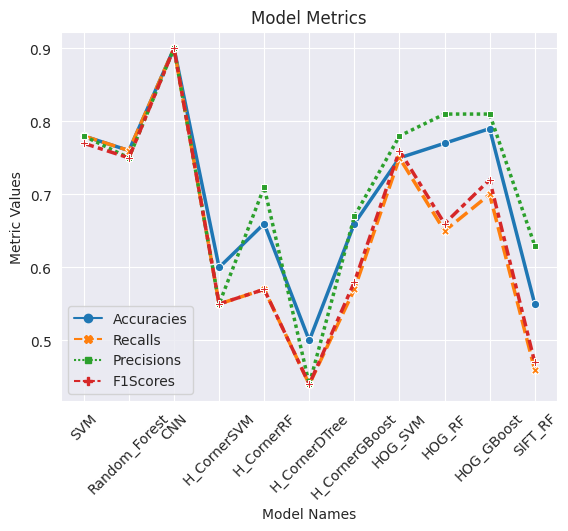

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set_style("darkgrid")

# Plot the line chart
sns.lineplot(data=df, markers=True, linewidth=2.5)

# Set the title and labels
plt.title('Model Metrics')
plt.xlabel('Model Names')
plt.ylabel('Metric Values')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


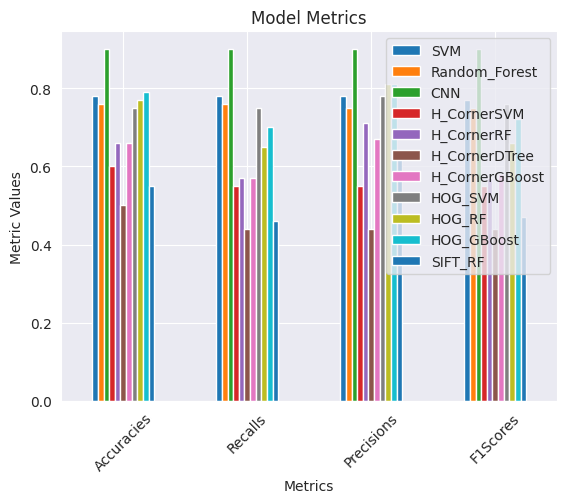

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set_style("darkgrid")

# Transpose the DataFrame to have Model Names as columns
df_transposed = df.transpose()

# Plot the grouped bar chart
df_transposed.plot(kind='bar')

# Set the title and labels
plt.title('Model Metrics')
plt.xlabel('Metrics')
plt.ylabel('Metric Values')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.legend(loc='upper right')
plt.show()


##Comments##

from the data frame , it can be infered that CNN model outperforms others even with the fact that different feature extraction technic were adopted to fit the model and calculate its metrics. CNN model however, has its own feature extraction built in to its architecture and its able to extract the important feature better than others like Haris Corner, Histogram Oriented Gradients and SIFT technics.